<a href="https://colab.research.google.com/github/Remonah-3/Github_Assignment/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 1/1000 - Loss: 28.500000
Iteration 101/1000 - Loss: 0.011134
Iteration 201/1000 - Loss: 0.007938
Iteration 301/1000 - Loss: 0.005659
Iteration 401/1000 - Loss: 0.004034
Iteration 501/1000 - Loss: 0.002876
Iteration 601/1000 - Loss: 0.002051
Iteration 701/1000 - Loss: 0.001462
Iteration 801/1000 - Loss: 0.001042
Iteration 901/1000 - Loss: 0.000743
Iteration 1000/1000 - Loss: 0.000532

Predictions with bias: [ 2.94484012  4.9659716   6.98710309  9.00823457 11.02936606]
MSE: 0.0010594097653372704


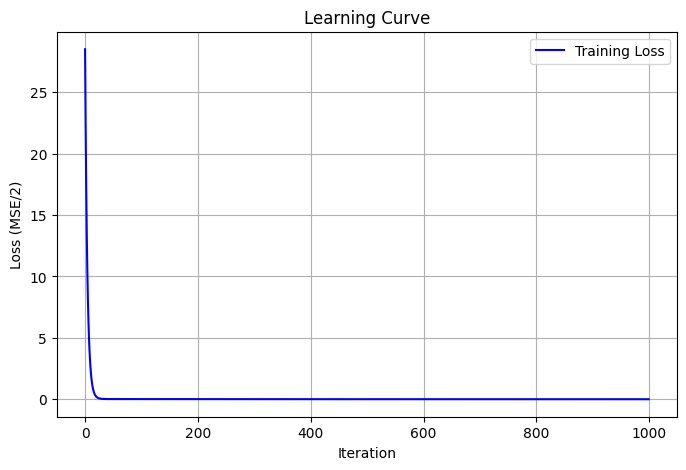

Iteration 1/1000 - Loss: 28.500000
Iteration 101/1000 - Loss: 0.090909
Iteration 201/1000 - Loss: 0.090909
Iteration 301/1000 - Loss: 0.090909
Iteration 401/1000 - Loss: 0.090909
Iteration 501/1000 - Loss: 0.090909
Iteration 601/1000 - Loss: 0.090909
Iteration 701/1000 - Loss: 0.090909
Iteration 801/1000 - Loss: 0.090909
Iteration 901/1000 - Loss: 0.090909
Iteration 1000/1000 - Loss: 0.090909

Predictions without bias: [ 2.27272727  4.54545455  6.81818182  9.09090909 11.36363636]
MSE without bias: 0.1818181818181819
Iteration 1/5000 - Loss: 303.700000
Iteration 101/5000 - Loss: 34.382328
Iteration 201/5000 - Loss: 19.086524
Iteration 301/5000 - Loss: 12.956104
Iteration 401/5000 - Loss: 8.892266
Iteration 501/5000 - Loss: 6.128586
Iteration 601/5000 - Loss: 4.247031
Iteration 701/5000 - Loss: 2.965747
Iteration 801/5000 - Loss: 2.092986
Iteration 901/5000 - Loss: 1.498253
Iteration 1001/5000 - Loss: 1.092742
Iteration 1101/5000 - Loss: 0.816013
Iteration 1201/5000 - Loss: 0.626935
Iter

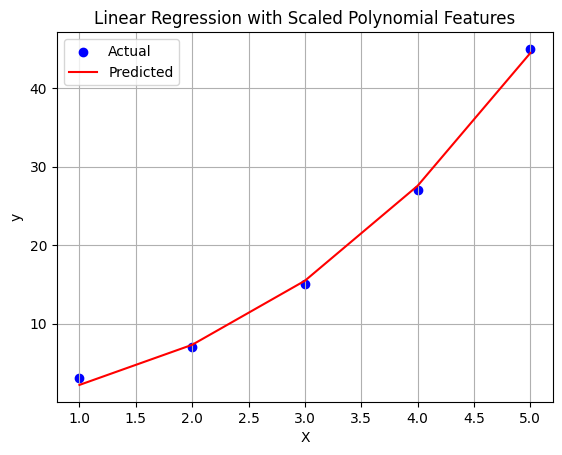


Validation MSE: 0.009013711576273996


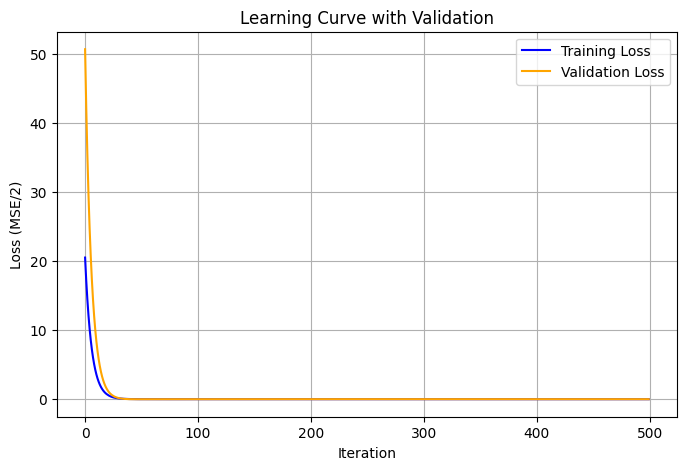


scikit-learn LinearRegression predictions: [ 3.  5.  7.  9. 11.]
MSE: 0.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Scratch Linear Regression Class

class ScratchLinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, no_bias=False, verbose=True):
        self.lr = learning_rate
        self.epochs = epochs
        self.no_bias = no_bias
        self.verbose = verbose
        self.coef_ = None
        self.loss = np.zeros(self.epochs)
        self.val_loss = np.zeros(self.epochs)

    # Linear hypothesis function hθ(x)
    def _linear_hypothesis(self, X):
        return np.dot(X, self.coef_)

    # Gradient descent update
    def _gradient_descent(self, X, error):
        m = X.shape[0]
        gradient = (1/m) * np.dot(X.T, error)
        self.coef_ -= self.lr * gradient
        # Step 10 explanation: This is derived from θ_j := θ_j - ∂J/∂θ_j
        # J(θ) = (1/2m) * Σ(hθ(x^(i)) - y^(i))^2
        # ∂J/∂θ_j = (1/m) * Σ(hθ(x^(i)) - y^(i)) * x_j^(i)

    # Fit method
    def fit(self, X, y, X_val=None, y_val=None):
        # Add bias if needed
        if not self.no_bias:
            ones = np.ones((X.shape[0], 1))
            X = np.hstack([ones, X])
            if X_val is not None:
                ones_val = np.ones((X_val.shape[0], 1))
                X_val = np.hstack([ones_val, X_val])

        self.coef_ = np.zeros(X.shape[1])

        for i in range(self.epochs):
            y_pred = self._linear_hypothesis(X)
            error = y_pred - y
            self._gradient_descent(X, error)
            self.loss[i] = np.mean(error ** 2) / 2

            if X_val is not None and y_val is not None:
                y_val_pred = self._linear_hypothesis(X_val)
                val_error = y_val_pred - y_val
                self.val_loss[i] = np.mean(val_error ** 2) / 2

            if self.verbose and (i % 100 == 0 or i == self.epochs-1):
                msg = f"Iteration {i+1}/{self.epochs} - Loss: {self.loss[i]:.6f}"
                if X_val is not None:
                    msg += f" - Val Loss: {self.val_loss[i]:.6f}"
                print(msg)

    # Predict
    def predict(self, X):
        if not self.no_bias:
            ones = np.ones((X.shape[0], 1))
            X = np.hstack([ones, X])
        return self._linear_hypothesis(X)


# Learning curve plotting function

def plot_learning_curve(train_loss, val_loss=None, title="Learning Curve"):
    plt.figure(figsize=(8,5))
    plt.plot(train_loss, label='Training Loss', color='blue')
    if val_loss is not None:
        plt.plot(val_loss, label='Validation Loss', color='orange')
    plt.xlabel('Iteration')
    plt.ylabel('Loss (MSE/2)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


# create polynomial features and scale

def create_polynomial_features(X, degrees=[1,2,3]):
    X_poly = np.hstack([X**d for d in degrees])
    X_poly_scaled = X_poly / np.max(X_poly, axis=0)  # scale to avoid nan
    return X_poly_scaled

# Example 1: Linear regression with bias

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([3, 5, 7, 9, 11])  # y = 2x + 1

model = ScratchLinearRegression(learning_rate=0.01, epochs=1000, no_bias=False)
model.fit(X, y)
y_pred = model.predict(X)

print("\nPredictions with bias:", y_pred)
print("MSE:", mean_squared_error(y, y_pred))
plot_learning_curve(model.loss)

# Example 2: Linear regression without bias

model_no_bias = ScratchLinearRegression(learning_rate=0.01, epochs=1000, no_bias=True)
model_no_bias.fit(X, y)
y_pred_no_bias = model_no_bias.predict(X)

print("\nPredictions without bias:", y_pred_no_bias)
print("MSE without bias:", mean_squared_error(y, y_pred_no_bias))

# Example 3: Polynomial regression (scaled)

y_poly = np.array([3, 7, 15, 27, 45])  # y = x + x^2 + x^3
X_poly_scaled = create_polynomial_features(X, degrees=[1,2,3])

model_poly = ScratchLinearRegression(learning_rate=0.01, epochs=5000)
model_poly.fit(X_poly_scaled, y_poly)
y_pred_poly = model_poly.predict(X_poly_scaled)

print("\nPredictions with scaled polynomial features:", y_pred_poly)
print("MSE:", mean_squared_error(y_poly, y_pred_poly))

plt.scatter(X, y_poly, color='blue', label='Actual')
plt.plot(X, y_pred_poly, color='red', label='Predicted')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with Scaled Polynomial Features")
plt.legend()
plt.grid(True)
plt.show()

# Example 4: Validation dataset demonstration

X_train = np.array([[1],[2],[3],[4]])
y_train = np.array([3,5,7,9])
X_val = np.array([[5]])
y_val = np.array([11])

model_val = ScratchLinearRegression(learning_rate=0.01, epochs=500, verbose=False)
model_val.fit(X_train, y_train, X_val=X_val, y_val=y_val)
print("\nValidation MSE:", mean_squared_error(y_val, model_val.predict(X_val)))
plot_learning_curve(model_val.loss, model_val.val_loss, title="Learning Curve with Validation")

# Example 5: Comparison with scikit-learn LinearRegression

lr = LinearRegression()
lr.fit(X, y)
y_pred_sklearn = lr.predict(X)
print("\nscikit-learn LinearRegression predictions:", y_pred_sklearn)
print("MSE:", mean_squared_error(y, y_pred_sklearn))





# Problem 10
The update formula for gradient descent comes from the derivative of the loss function with respect to each parameter
$
θ
j $. The loss function for linear regression is the mean squared error.

To make the loss smaller, we calculate how much
$
J(θ) $ changes when we change
$
θ
j$.
Gradient descent then updates each parameter a little in the opposite direction of this derivative.

This means we adjust
$
θ
j$ step by step to reduce the error, which is exactly what the formula in the question shows.

# Problem 11

In linear regression, the loss function (mean squared error) is a smooth, U-shaped curve called a convex function. This means it has only one lowest point, which is the global minimum, and no other local minima. Because of this, when we use gradient descent, the algorithm always moves toward this lowest point. As long as the learning rate is reasonable, gradient descent will eventually reach the optimal solution, so there is no risk of getting stuck in a local optimum.